##Introducción

**Qué es un borde?** 

El área donde hay diferencias extremas en las intensidades del píxel suele indicar un borde de un objeto.

El propósito de la detección de bordes es reducir significativamente el tamaño de los datos de la imagen mientras se conservan los atributos de la imagen original. Existen muchos algoritmos para la detección de bordes. Aunque el algoritmo de Canny es antiguo, se puede decir que es un algoritmo estándar para la detección de bordes y aún se usa ampliamente en la investigación.

**Tipos de bordes** 

Estos son los principales tipos de bordes ideales presentes en las imágenes. 

La forma en que cambia la intensidad de la imagen en una imagen determina el tipo de borde que está presente en esa posición. *La Figura 1* ayuda a ilustrar estas diferencias mediante el uso de una línea para representar las intensidades de imagen de los píxeles frente a la distancia en la dirección x o y de una imagen.

**Step Edge**(Borde escalonado): donde la intensidad de la imagen aumenta inmediatamente a lo largo de la distancia. 

**Ramp Edge**(Borde de rampa): donde la intensidad de la imagen aumenta gradualmente a lo largo de la distancia. 

**Roof Edge**(Borde del techo): donde la intensidad de la imagen aumenta temporalmente a lo largo de la distancia.

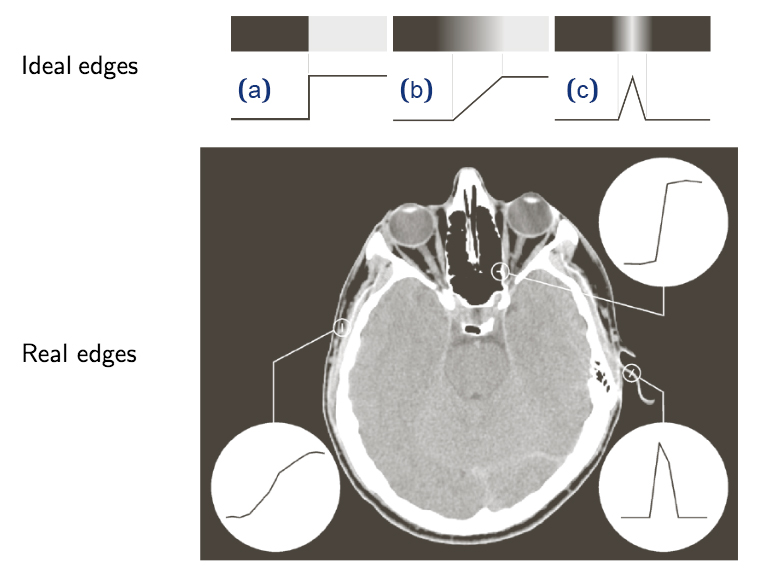

##Inicio

In [ ]:
!wget https://programarfacil.com/wp-content/uploads/2017/04/monedas.jpg
!wget https://raw.githubusercontent.com/KevinGay/PyEdge/master/jaguar.jpg

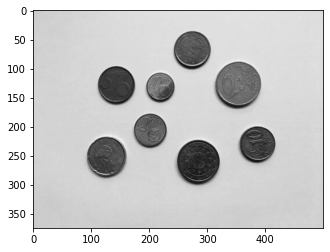

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ruta_moneda = "monedas.jpg"
ruta_jaguar = "jaguar.jpg"
image1 = cv2.imread(ruta_moneda,cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(ruta_jaguar,cv2.IMREAD_GRAYSCALE)
plt.imshow(image1,cmap='gray')

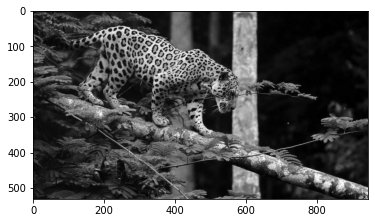

In [3]:
plt.imshow(image2,cmap='gray')

##Laplacian

A diferencia del detector de bordes de Sobel y Prewitt, el detector de bordes de Laplacian usa solo un núcleo. Calcula derivadas de segundo orden en una sola pasada. Aquí está el núcleo utilizado para ello:

***Kernel Laplacian***

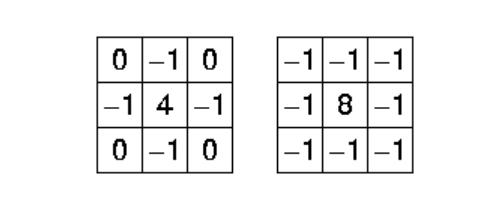

###Ejemplo con OpenCV

In [ ]:
!wget https://raw.githubusercontent.com/abhilas0/edge_detection/master/output/butterfly.jpg

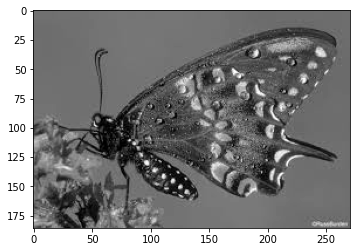

In [5]:
#read the image in gray scale
img2 = cv2.imread('butterfly.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,cmap='gray')

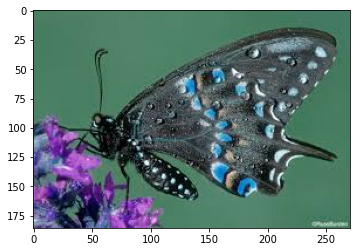

In [11]:
img3 = cv2.imread('butterfly.jpg')
plt.imshow(img3,cmap='gray')

**Gaussian blur**

Debido a que estas máscaras se aproximan a una segunda derivada de la imagen, son muy sensibles al ruido. Para corregir esto, la imagen a menudo se suaviza con Gauss antes de aplicar el filtro laplaciano.

In [7]:
#apply gaussian blur
blur_img = cv2.GaussianBlur(img2, (3, 3), 0)

In [14]:
# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
#laplacian2 = cv2.Laplacian(img2, cv2.CV_64F)

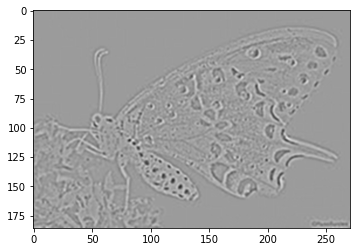

In [15]:
cv2.imwrite('lap_butterfly.jpg', laplacian)
plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()

In [ ]:
#cv2.imwrite('lap_butterfly.jpg', laplacian)
#plt.imshow(laplacian2, cmap = 'gray',interpolation = 'bicubic')
#plt.show()

###Ejemplo2 con OpenCV

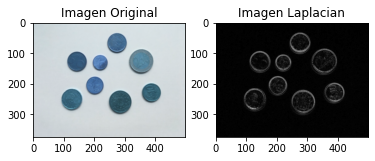

In [20]:
kernel_size = 3
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread(ruta_moneda)
img = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray_lap = cv2.Laplacian(gray,ddepth,ksize = kernel_size,scale = scale,delta = delta)
dst = cv2.convertScaleAbs(gray_lap)
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Operación Morfologica Dilatación')
ax1.imshow(img,cmap='gray')
ax1.set_title("Imagen Original")
ax2.set_title("Imagen Laplacian")
ax2.imshow(dst,cmap='gray')
#plt.figure(figsize=(20, 10)) 
#fig.savefig('laplacian.png')

##Sobel

Sobel es un operador muy común para detectar bordes de una imagen, que es una aproximación a una derivada de una imagen. Está separado en las direcciones y e x. Aquí usamos una matriz kernel 3*3, una para cada dirección x e y. 

El degradado para la dirección x tiene números negativos a la izquierda y números positivos a la derecha y estamos preservando los píxeles centrales. De manera similar, el degradado para la dirección y tiene números negativos en la parte inferior y números positivos en la parte superior y aquí estamos en el medio fila de píxeles.

**Sobel con kernels**

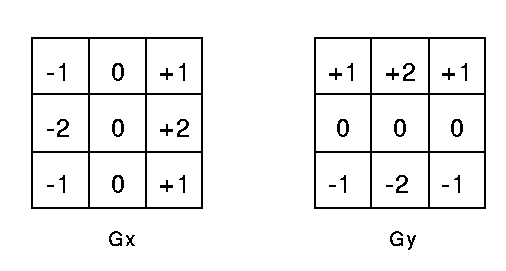

###Utilizando openCV

In [21]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/abhilas0/edge_detection/master/output/jet.jpg

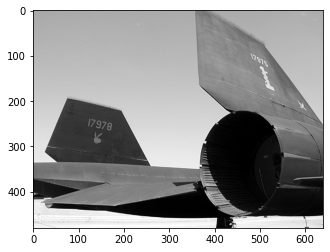

In [25]:
#read the gray scale image
image = cv2.imread('jet.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [26]:
#define horizontal and Vertical sobel kernels
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

**Definir kernel Función de convolución **

Función de convolución: una forma de multiplicar dos matrices de números, generalmente de diferentes tamaños, aquí una imagen en escala de grises y núcleos sobel/prewitt, para producir una tercera matriz de números de la misma dimensionalidad. La convolución se realiza deslizando el núcleo aplicado sobre todos los píxeles de la imagen.

**A** es la imagen de origen y  denota la operación de convolución.

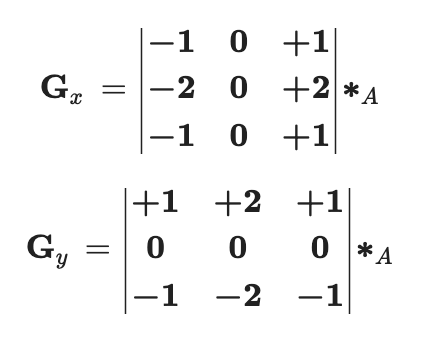

In [27]:
#define kernal convolution function
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [28]:
#normalizing the vectors
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

**Magnitud del gradiente**

El componente de gradiente en cada orientación luego se combinó para encontrar la magnitud absoluta del gradiente en cada punto y la orientación de ese gradiente.

In [29]:
#calculate the gradient magnitude of vectors
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
# mapping values from 0 to 255
sob_out = (sob_out / np.max(sob_out)) * 255

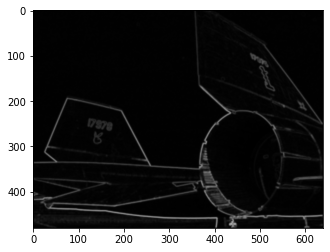

In [30]:
#output images
cv2.imwrite('sobel_jet.jpg', sob_out)
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

##Utilizando OpenCV Sobel

In [32]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
img_sobel = img_sobelx + img_sobely

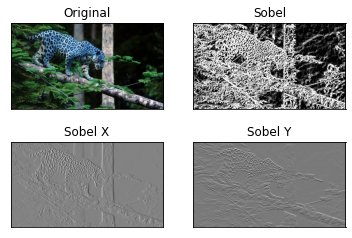

In [45]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

###Usando Algoritmo

In [ ]:
from PIL import Image
import math

class Sobel(object):

    def __init__(self, imPath):

        self.im = Image.open(imPath).convert('L')
        self.width, self.height = self.im.size
        mat = self.im.load()

        sobelx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
        sobely = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

        self.sobelIm = Image.new('L', (self.width, self.height))
        pixels = self.sobelIm.load()

        linScale = .25

        #For each pixel in the image
        for row in range(self.width-len(sobelx)):
            for col in range(self.height-len(sobelx)):
                Gx = 0
                Gy = 0
                for i in range(len(sobelx)):
                    for j in range(len(sobely)):
                        val = mat[row+i, col+j] * linScale
                        Gx += sobelx[i][j] * val
                        Gy += sobely[i][j] * val

                pixels[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))
    def saveGray(self,name):
        self.im.save(name)

    def saveIm(self, name):
        self.sobelIm.save(name)

def test():
    im = 'monedas'
    inName = im + '.jpg'
    outName = im + '-sobelNew.jpg'
    sobel = Sobel(inName)
    sobel.saveIm(outName)
    sobel.saveGray('jaguar-gray.jpg')
test()

##CANNY

DETECCIÓN DE BORDES POR CANNY
	El algoritmo de detección de bordes de Canny fue desarrollado
	en 1986 por John F. Canny en el MIT.
	Se trata d eun algortimo por pasos:
	
	1.- Reducción de ruido. Como la detección de bordes es susceptible
	al ruido, lo primero que hace el algoritmo es reducir el ruido con un
	filtro Gaussiano de 5x5.
	
	2.- Hallar el gradiente de intensidad de una imagen. Se halla la derivada
	en dirección x & en dirección y para encontrar el gradiente en cada dirección.
	Posteriormente, con ambas matrices, se puede hallar la dirección de cada pixel
	de acuerdo a:
	BordeDelGradiente(G) = Sqrt(Gx^2 + Gy^2)
	Angulo(theta) = arctan(Gy/Gx)
	La dirección del gradiente siempre es perpendicular a los bordes. Se redondea a uno
	de los cuatro ángulos que rperesenten las direcciones vertical, horizontal y diagonales
	
	3.- Se hace un análisis de la imagen para suprimir los no-máximos, esto es
	se remueven todos los pixeles que no constituyen un borde.
	
	4.-Umbralización por histéresis. Este paso decide cuales son realmente bordes, usando
	dos valores umbral. Todos los valores por encima del umbral máximo son ejes, todos por debajo
	del valor mínimo no son ejes, mientras que los valores entre ambos umbrales se descartan
	dependiendo de su conectividad con los píxeles adyacentes.

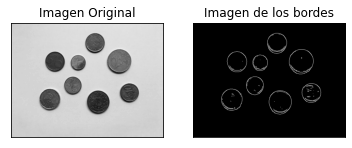

In [34]:


img = cv2.imread(ruta_moneda,0)
# Aquí se usa la función Canny que trae ambos umbrales
edges = cv2.Canny(img,200,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Imagen de los bordes'), plt.xticks([]), plt.yticks([])

plt.show()

##Roberts

In [ ]:
from PIL import Image
import math

class Roberts(object):

    def __init__(self, imPath):

        im = Image.open(imPath).convert('L')
        self.width, self.height = im.size
        mat = im.load()

        robertsx = [[1,0],[0,-1]]
        robertsy = [[0,1],[-1,0]]

        self.sobelIm = Image.new('L', (self.width, self.height))
        pixels = self.sobelIm.load()

        linScale = .7

        #For each pixel in the image
        for row in range(self.width-len(robertsx)):
            for col in range(self.height-len(robertsy)):
                Gx = 0
                Gy = 0
                for i in range(len(robertsx)):
                    for j in range(len(robertsy)):
                        val = mat[row+i, col+j] * linScale
                        Gx += robertsx[i][j] * val
                        Gy += robertsy[i][j] * val

                pixels[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))

    def saveIm(self, name):
        self.sobelIm.save(name)

def test():
    im = 'monedas'
    inName = im + '.jpg'
    outName = im + '-roberts.jpg'
    roberts = Roberts(inName)
    roberts.saveIm(outName)
test()

###Con OpenCV

In [35]:
import cv2
import numpy as np
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )

img = cv2.imread(ruta_moneda,0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)


True

##Prewitt

El operador de Prewitt es similar al operador de Sobel y se usa para detectar bordes verticales y horizontales en imágenes. Nos proporciona dos máscaras, una para detectar bordes en dirección horizontal y otra para detectar bordes en dirección vertical.

**prewitt's_kernel**

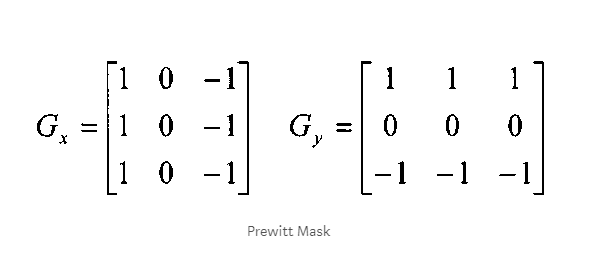

###Utilizando OpenCV

In [ ]:
!wget https://raw.githubusercontent.com/abhilas0/edge_detection/master/output/knife.jpg

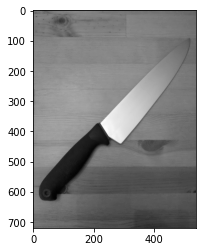

In [37]:
#read the image in gray scale
img = cv2.imread('knife.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [38]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [39]:
#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

In [40]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

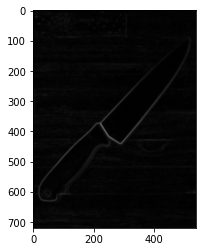

In [41]:
#output images
cv2.imwrite('prewitt_knife.jpg', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

###Utilizando Algoritmo

In [42]:
from PIL import Image
import math

class Prewitt(object):

    def __init__(self, imPath):

        im = Image.open(imPath).convert('L')
        self.width, self.height = im.size
        mat = im.load()

        prewittx = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
        prewitty = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

        self.prewittIm = Image.new('L', (self.width, self.height))
        pixels = self.prewittIm.load()

        linScale = .3

        #For each pixel in the image
        for row in range(self.width-len(prewittx)):
            for col in range(self.height-len(prewittx)):
                Gx = 0
                Gy = 0
                for i in range(len(prewittx)):
                    for j in range(len(prewitty)):
                        val = mat[row+i, col+j] * linScale
                        Gx += prewittx[i][j] * val
                        Gy += prewitty[i][j] * val

                pixels[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))

    def saveIm(self, name):
        self.prewittIm.save(name)

def test():
    im = 'monedas'
    inName = im + '.jpg'
    outName = im + '-prewitt.jpg'
    prewitt = Prewitt(inName)
    prewitt.saveIm(outName)
test()

##Laplaciano y Sobel(Gradiente de imágenes)

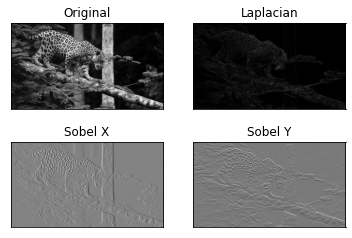

In [43]:
img = cv2.imread(ruta_jaguar,0)

# Aplicar el Laplaciano y Sobel
laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

##Resumen Canny, Prewitt and Sobel

In [44]:
import cv2
import numpy as np

img = cv2.imread(ruta_jaguar)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

"""
cv2_imshow("Original Image", img)
cv2.imshow("Canny", img_canny)
cv2.imshow("Sobel X", img_sobelx)
cv2.imshow("Sobel Y", img_sobely)
cv2.imshow("Sobel", img_sobel)
cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)
"""



'\ncv2_imshow("Original Image", img)\ncv2.imshow("Canny", img_canny)\ncv2.imshow("Sobel X", img_sobelx)\ncv2.imshow("Sobel Y", img_sobely)\ncv2.imshow("Sobel", img_sobel)\ncv2.imshow("Prewitt X", img_prewittx)\ncv2.imshow("Prewitt Y", img_prewitty)\ncv2.imshow("Prewitt", img_prewittx + img_prewitty)\n'

##MSE RMSE PSNR

In [ ]:
from PIL import Image
import math

class Comparisons(object):
    """
    Creates an object where the arguments are two images. You can then call
    any of the functions to obtain the MSE, RMSE, or PSNR.
    """

    def __init__(self, image, noisyImage):
        """
        :param image: The path to the original image with no noise.
        :param noisyImage: The path to the noisy image.
        """

        self.image = image
        self. noisyImage = noisyImage


    def MSE(self):
        """
        Pre: image and noisy image are assumed to be of the same dimensions
        :return: The mean squared error as a float
        """
        im = Image.open(self.image).convert('L')
        width, height = im.size
        mat = im.load()

        noise = Image.open(self.noisyImage).convert('L')
        noiseMat = noise.load()

        squareDiff = []

        for i in range(width):
            for j in range(height):
                squareDiff.append(pow(mat[i, j] - noiseMat[i, j],2))

        meanSquaredError = sum(squareDiff) / len(squareDiff)
        return meanSquaredError

    def RMSE(self):
        """
        Pre: image and noisy image are assumed to be of the same dimensions
        :return: The root mean squared error as a float
        """
        mse = self.MSE()
        rmse = math.sqrt(mse)
        return rmse

    def PSNR(self):
        """
        Pre: image and noisy image are assumed to be of the same dimensions
        :return: the peak-signal-to-noise ratio between two images
        """
        mse = self.MSE()
        return 10.0 * math.log10(pow(255.0, 2) / mse)


def test():
    c = Comparisons('jaguar.jpg', 'jaguar-noise0.05.jpg')
    print(c.RMSE())
    print(c.PSNR())

##Repaso

Practicar:
https://github.com/abhilas0/edge_detection

https://programarfacil.com/blog/vision-artificial/detector-de-bordes-canny-opencv/

https://omes-va.com/contando-objetos-aplicando-deteccion-de-bordes-con-canny-en-python-opencv/